In [1]:
import simulator, grn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def visualize(T, Y, grn):
    fig, ax = plt.subplots(len(grn.species), 1, figsize=(10, 5))
    for i in range(len(ax)):
        ax[i].plot(T, Y[:, i])
        ax[i].set_ylabel(grn.species_names[i])
    ax[-1].set_xlabel("time [a.u.]")

In [3]:
my_grn = grn.grn()

In [4]:
# input species
my_grn.add_input_species("X1")
my_grn.add_input_species("X2")
my_grn.add_input_species("S0")

# other species
my_grn.add_species("MUX", 0.1)

In [5]:
# X1 AND NOT S0
regulators = [{'name': 'X1', 'type': 1, 'Kd': 5, 'n': 2},
                {'name': 'S0', 'type': -1, 'Kd': 5, 'n': 3}]
products = [{'name': 'MUX'}]

# adding a gene to the network - the first parameter specifies the rate of gene expression
my_grn.add_gene(10, regulators, products)

In [6]:
# X2 AND S0
regulators = [{'name': 'X2', 'type': 1, 'Kd': 5, 'n': 2},
                {'name': 'S0', 'type': 1, 'Kd': 5, 'n': 3}]
products = [{'name': 'MUX'}]

# adding a gene to the network - the first parameter specifies the rate of gene expression
my_grn.add_gene(10, regulators, products)

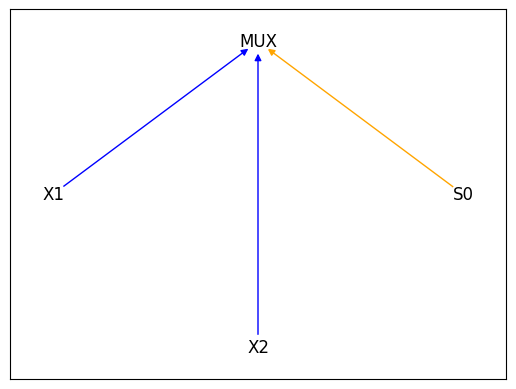

In [7]:
my_grn.plot_network()

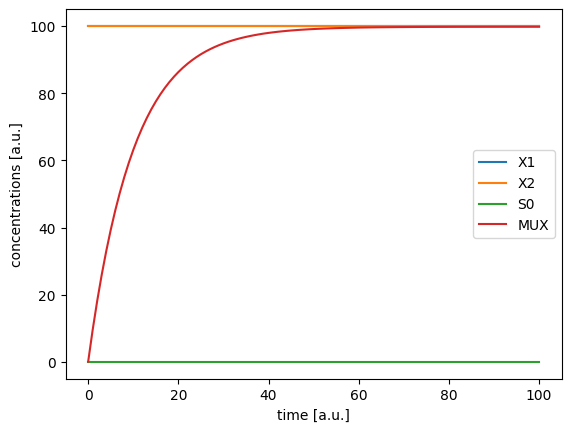

In [8]:
# Manually specify inputs if you want

IN = np.zeros(len(my_grn.input_species_names))
IN[0]=100
IN[1]=100

T, Y = simulator.simulate_single(my_grn, IN)

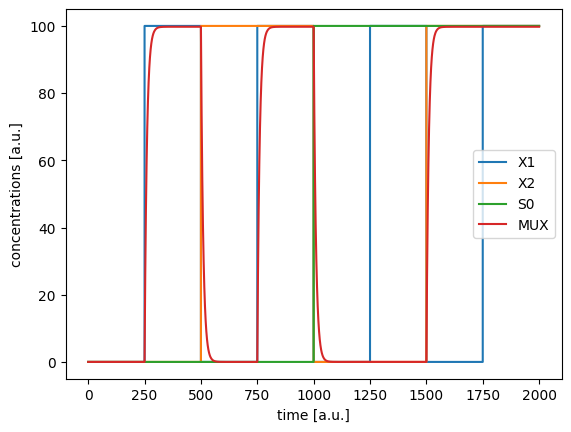

In [9]:
inputs = [
    (0, 0, 0),
    (100, 0, 0),
    (0, 100, 0),
    (100, 100, 0),
    (0, 0, 100),
    (100, 0, 100),
    (0, 100, 100),
    (100, 100, 100)
]
T, Y = simulator.simulate_sequence(my_grn, inputs, t_single = 250)

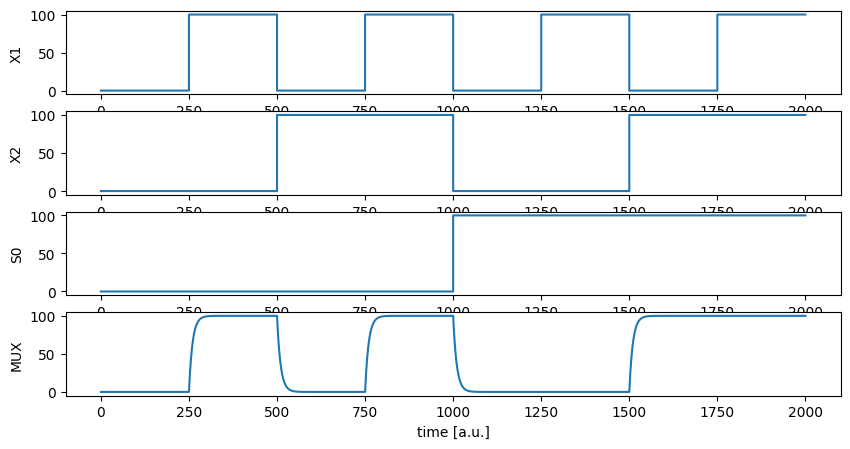

In [10]:
visualize(T, Y, my_grn)